<a href="https://colab.research.google.com/github/GornostaevGO/StatPrak24/blob/main/2_numpy%2Bmatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-3.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_-2.0.png?raw=true" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://github.com/V-Kisielius/StatPrak24/blob/main/imgs/tangent_line_1.7.png?raw=true" width="600"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)

def f_der(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)

def tangent_line(x, x_point):
    slope = f_der(x_point)
    intercept = f(x_point) - slope * x_point
    return slope * x + intercept

def beauty_derivative_plot(x_point):
    x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
    y = f(x)
    x_tg = np.linspace(x_point - 1, x_point + 1, 200)
    y_der = f_der(x)
    tangent = tangent_line(x_tg, x_point)

    plt.plot(x, y, label="f(x) = 2sin(x) - cos(2x)", color="blue")
    plt.plot(x, y_der, "r--", label="f'(x) = 2cos(x) + 2sin(2x)")

    plt.plot(
        x_tg, tangent, label="Tangent line at x={:.2f}".format(x_point), color="green"
    )
    plt.plot(x_point, f(x_point), "o", color="black")
    plt.xlim(x_point - 1, x_point + 1)

    plt.plot(
        [x_point, x_point, 0],
        [0, f(x_point), f(x_point)],
        color="purple",
        linestyle=":",
    )
    plt.plot(x_point, f(x_point), "o", color="black")
    plt.annotate(f"f'({x_point:.2f})={f_der(x_point):.2f}", fontsize=13, xy=(x_point, f(x_point)), xytext=(x_point, f(x_point) - 3), weight = "light",
                 arrowprops=dict(arrowstyle='-|>', facecolor='orange',  edgecolor='orange'))

    plt.legend(loc="best")
    plt.grid(True)
    plt.xlim(-2 * np.pi, 2 * np.pi)
    plt.ylim(-4, 4)
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.figure(figsize=(10,20))

    plt.show()

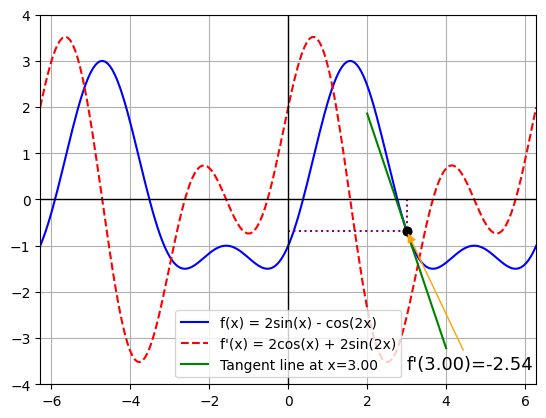

<Figure size 1000x2000 with 0 Axes>

In [2]:
beauty_derivative_plot(3)

## Problem 2

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with
```python
np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
```
and do the following exercises **without for-loops**.

**!! Ссылка на данный момент не работает. Нашел populations.txt в интернете.**

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

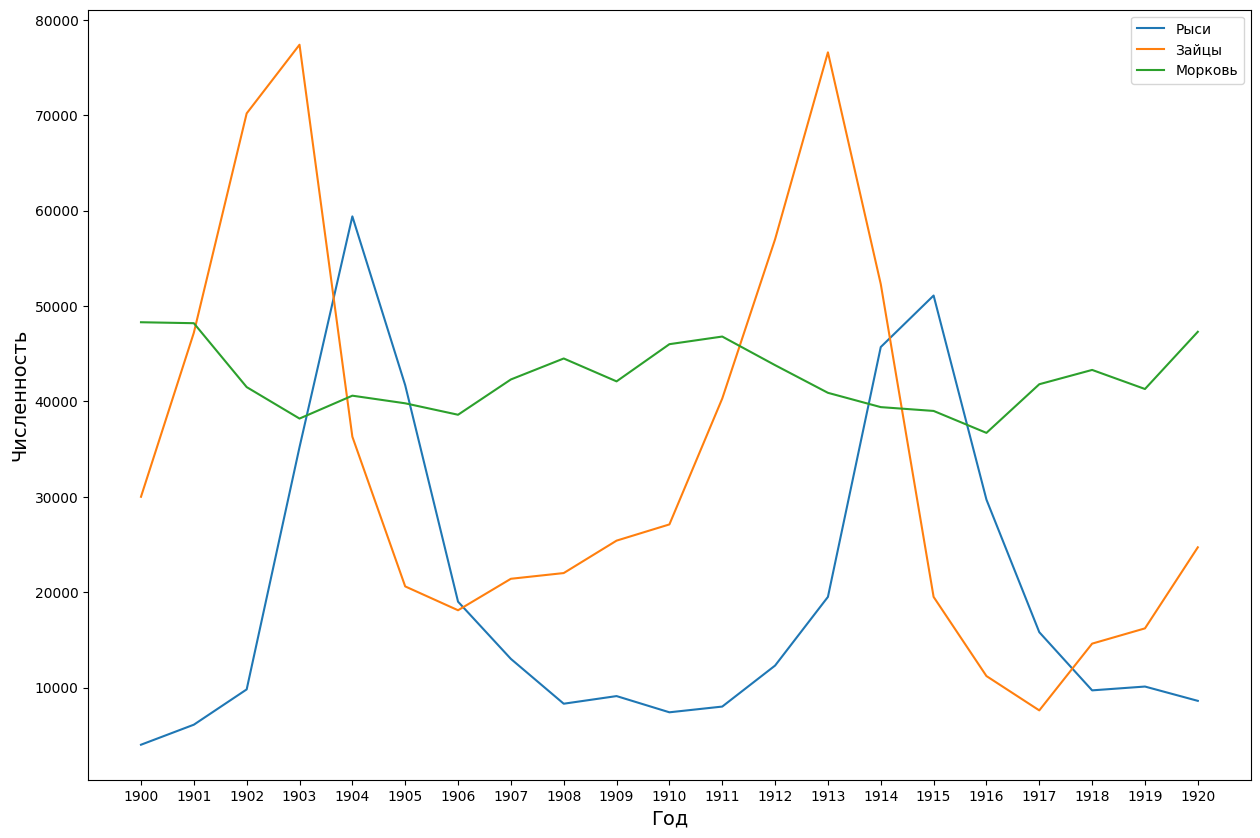

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('/content/populations.txt')
years, krolik, pbICb, morkovka = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

plt.figure(figsize = (15,10))
plt.plot(years, pbICb, label='Рыси')
plt.plot(years, krolik, label='Зайцы')
plt.plot(years, morkovka, label='Морковь')
plt.xlabel('Год', fontsize=14)
plt.xticks(years)
plt.ylabel('Численность', fontsize=14)
plt.legend()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

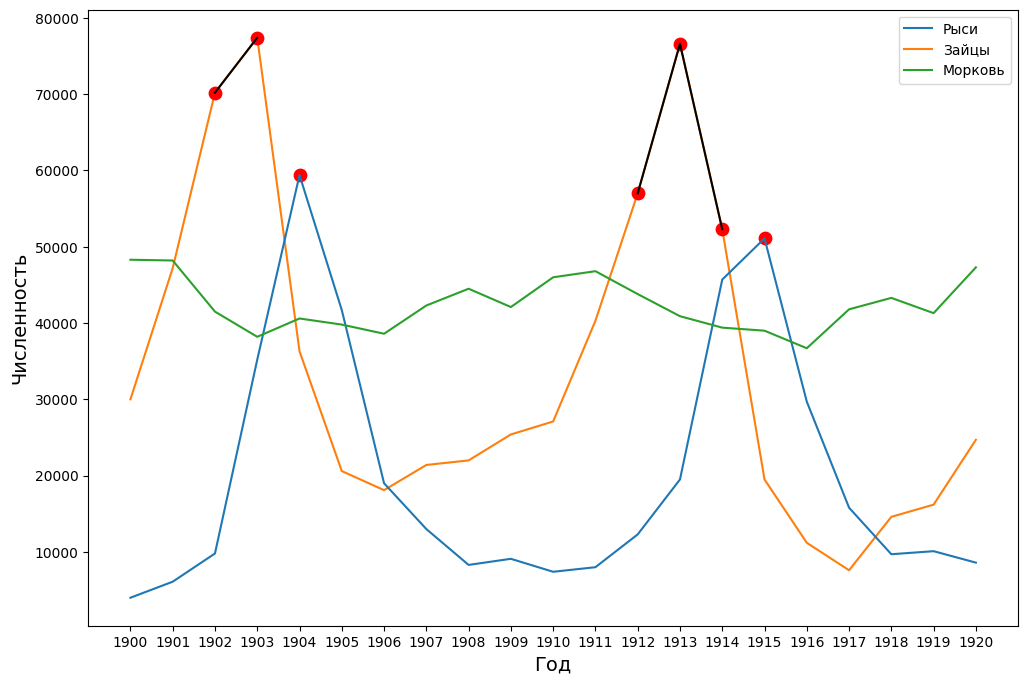

In [4]:
plt.figure(figsize = (12,8))
plt.scatter(years[pbICb >= 50000], pbICb[pbICb >= 50000], color = 'red', s = 80)
plt.scatter(years[krolik >= 50000], krolik[krolik >= 50000], color = 'red', s = 80)
plt.scatter(years[morkovka >= 50000], morkovka[morkovka >= 50000], color = 'red', s = 80)

#представляю как разбить года на подмассивы, отвечающие промежуткам с заданными условиями,
#но не знаю как без цикла (в общем случае) реализовать отрисовку графиков, отвечающих подмассивам
#иначе соединяются точки, которые "не рядом"

yearsk1 = np.array([1902, 1903])
yearsk2 = np.array([1912, 1913, 1914])

plt.plot(yearsk1, krolik[yearsk1 - 1900], color = 'black', zorder = 1)
plt.plot(yearsk2, krolik[yearsk2 - 1900], color = 'black', zorder = 2)

plt.plot(years, pbICb, label='Рыси')
plt.plot(years, krolik, label='Зайцы', zorder = -1)
plt.plot(years, morkovka, label='Морковь')
plt.xlabel('Год', fontsize=14)
plt.xticks(years)
plt.ylabel('Численность', fontsize=14)
plt.legend()
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

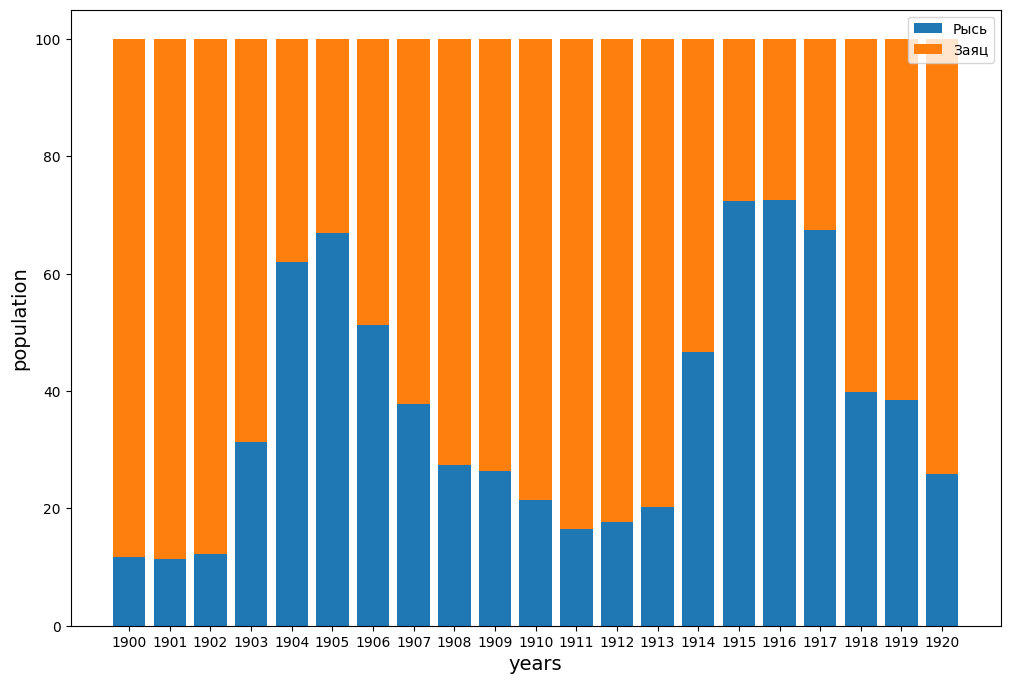

In [5]:
plt.figure(figsize=(12, 8))
plt.bar(years, np.divide(pbICb,(pbICb + krolik)) * 100, label = 'Рысь')
plt.bar(years, np.divide(krolik,(pbICb + krolik)) * 100, bottom = np.divide(pbICb,(pbICb + krolik)) * 100, label = 'Заяц')
plt.xlabel('years', fontsize=14)
plt.ylabel('population', fontsize=14)
plt.xticks(years)
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

20897.906458089667 16254.591536908763 3322.5062255844787


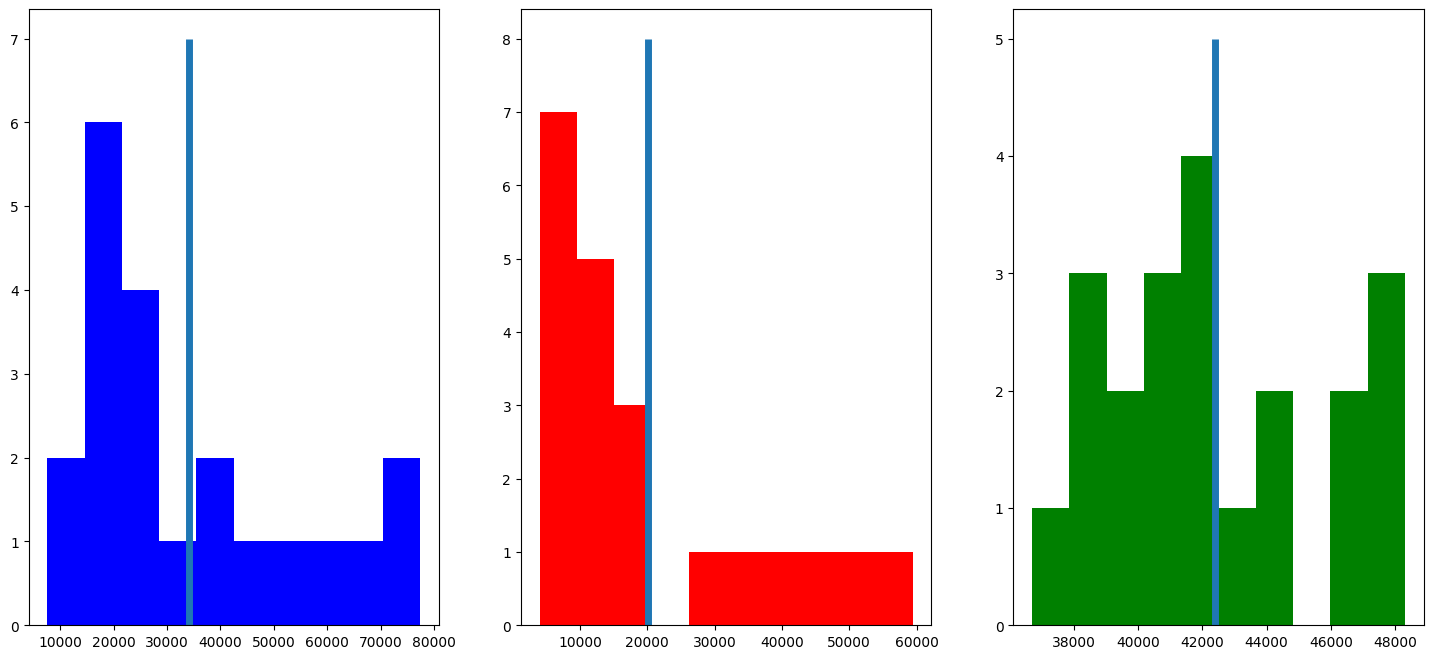

In [6]:
print(np.std(krolik), np.std(pbICb), np.std(morkovka))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 8))

ax1.hist(krolik, bins = 10, color = 'blue')
ax1.vlines(np.mean(krolik), 0, 7, linewidth = 5)

ax2.hist(pbICb, bins = 10, color = 'red')
ax2.vlines(np.mean(pbICb), 0, 8, linewidth = 5)

ax3.hist(morkovka, bins = 10, color = 'green')
ax3.vlines(np.mean(morkovka), 0, 5, linewidth = 5)

fig.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

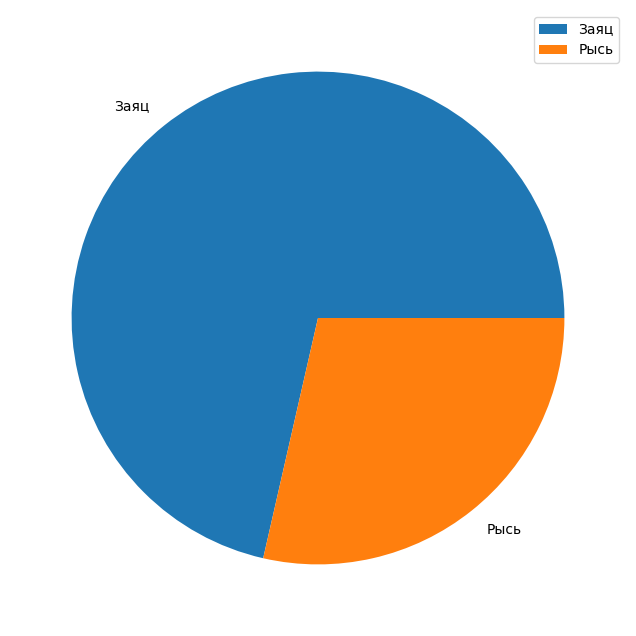

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


In [7]:
arr = np.array([None]*21)
mask = krolik >= pbICb
arr[mask] = 'H'
arr[np.logical_not(mask)] = 'L'

size = [np.count_nonzero(krolik >= pbICb), 21 - np.count_nonzero(krolik >= pbICb)]
labels = ['Заяц', 'Рысь']

plt.figure(figsize=(12, 8))
plt.pie(size, labels=labels)
plt.legend()
plt.show()

print(arr)

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

0.07189206073535571


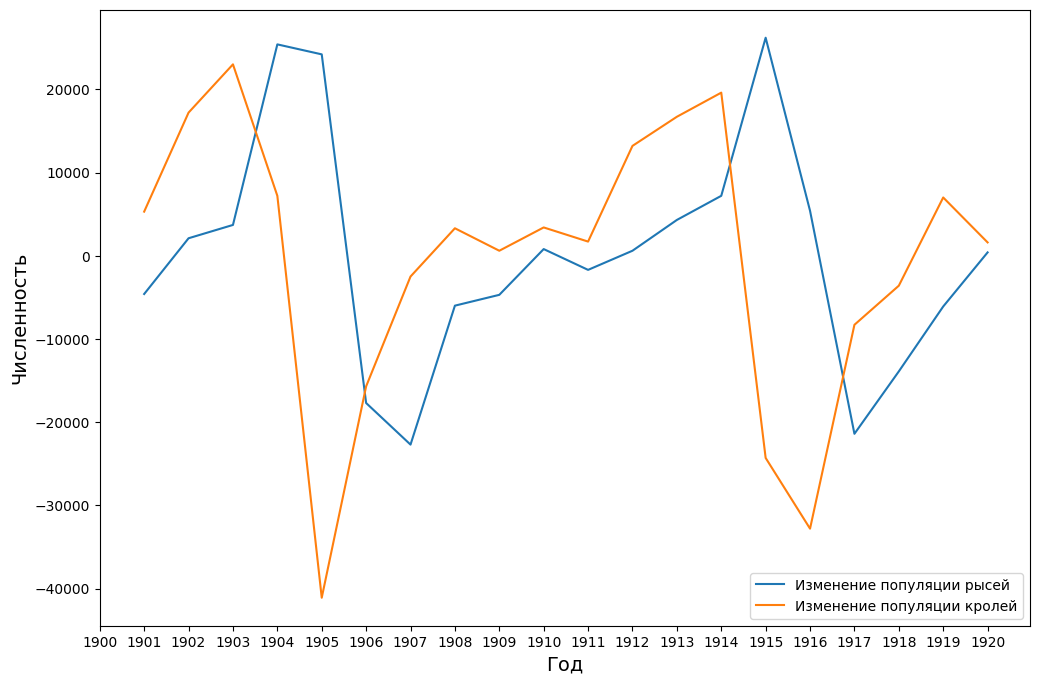

In [8]:
print(np.corrcoef(krolik, pbICb)[0][1])

plt.figure(figsize = (12,8))

plt.plot(years[:20] + 1, (pbICb - np.roll(pbICb,1))[:20], label='Изменение популяции рысей', zorder = -1)
plt.plot(years[:20] + 1, (krolik - np.roll(krolik,1))[:20], label='Изменение популяции кролей', zorder = -1)

plt.xlabel('Год', fontsize=14)
plt.xticks(years)
plt.ylabel('Численность', fontsize=14)
plt.legend()
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

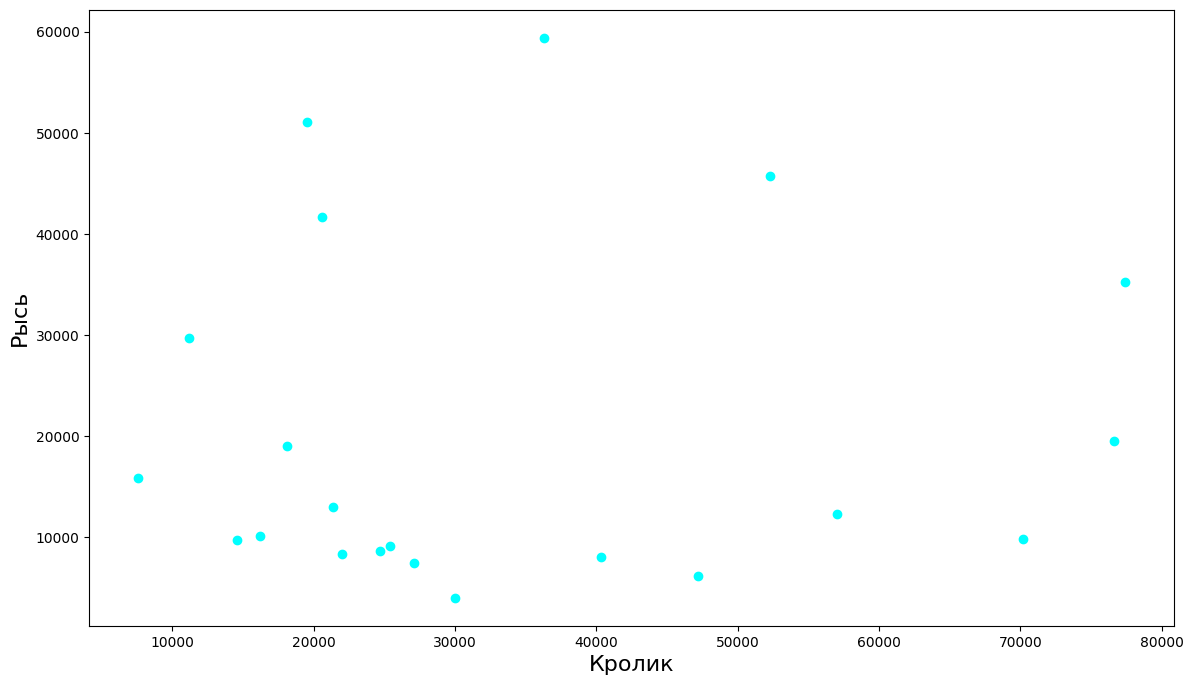

In [9]:
plt.figure(figsize = (14, 8))

plt.scatter(krolik, pbICb, label='Кролик vs Рысь', color = 'cyan')
plt.title
plt.xlabel('Кролик', fontsize=16)
plt.ylabel('Рысь', fontsize=16)

fig.legend()
fig.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('/content/populations.txt')
year = data[:, 0].reshape(-1, 1)
krolik = data[:, 1]
pbICb = data[:, 2]
morkovka = data[:, 3]
# возьмем модель линейной регрессии
linregr = LinearRegression ()
linregr.fit (year, krolik)
pop_forecast = linregr.predict ([[1920]])
pop_real = 24.7e3
pop_error = abs(pop_forecast - pop_real) / pop_real
print(f"Ожидаемая популяция зайцев в 1920: {pop_forecast[0]}")
print(f"Реальная популяция зайцев в 1920: {pop_real}")
print(f"Ошибка в вычислении популяции: {pop_error[0]}")

Ожидаемая популяция зайцев в 1920: 20649.78354978375
Реальная популяция зайцев в 1920: 24700.0
Ошибка в вычислении популяции: 0.16397637450268213
